In [1]:
# special call that tells notebook to keep matlplotlib figures open
%config InlineBackend.close_figures = False

# special call that tells notebook to show matlplotlib figures inline
%matplotlib inline

import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # fundamental package for scientific computing, handles arrays and math

# import the tdt library
import tdt


In [2]:
# Must read with "/" not "\"
BLOCK_PATH = 'C:/Users/yongc/Desktop/Synapse/Tanks/VirusTest-240116-082958/dLight_mPFC-240209-121108'
data = tdt.read_block(BLOCK_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Synapse/Tanks/VirusTest-240116-082958/dLight_mPFC-240209-121108\Notes.txt
read from t=0s to t=409.8s


In [8]:
REF_EPOC     = 'Pinches'
STREAM_STORE = '_465A'
ARTIFACT     = np.inf       # optionally set an artifact rejection level
CHANNEL      = 3
TRANGE       = [-0.3, 0.8]  # window size [start time relative to epoc onset, window duration]

In [4]:
data = tdt.read_block(BLOCK_PATH, evtype=['epocs','scalars','streams'], channel=CHANNEL)

Found Synapse note file: C:/Users/yongc/Desktop/Synapse/Tanks/VirusTest-240116-082958/dLight_mPFC-240209-121108\Notes.txt
read from t=0s to t=409.8s


In [18]:
data = tdt.epoc_filter(data, 'Note', t=TRANGE)
print(data)

epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[103.54801792, 181.71198592, 220.036128  , 258.2526272 ,
        300.42078336, 328.41579648, 355.99400064],
       [104.34801792, 182.51198592, 220.836128  , 259.0526272 ,
        301.22078336, 329.21579648, 356.79400064]])
time_ref:	[-0.3, 0.8]
filter:	'TIME:Note [-0.3:0.8];TIME:Note [-0.3:0.8];'


In [9]:
art1 = np.array([np.any(x>ARTIFACT) for x in data.streams[STREAM_STORE].filtered], dtype=bool)
art2 = np.array([np.any(x<-ARTIFACT) for x in data.streams[STREAM_STORE].filtered], dtype=bool)
good = np.logical_not(art1) & np.logical_not(art2)
data.streams[STREAM_STORE].filtered = [data.streams[STREAM_STORE].filtered[i] for i in range(len(good)) if good[i]]
num_artifacts = np.sum(np.logical_not(good))
if num_artifacts == len(art1):
    raise Exception('all waveforms rejected as artifacts')

In [10]:
min_length = np.min([len(x) for x in data.streams[STREAM_STORE].filtered])
data.streams[STREAM_STORE].filtered = [x[:min_length] for x in data.streams[STREAM_STORE].filtered]

In [11]:
all_signals = np.vstack(data.streams[STREAM_STORE].filtered)
mean_signal = np.mean(all_signals, axis=0)
std_signal = np.std(all_signals, axis=0)

In [12]:
ts = TRANGE[0] + np.arange(0, min_length) / data.streams[STREAM_STORE].fs

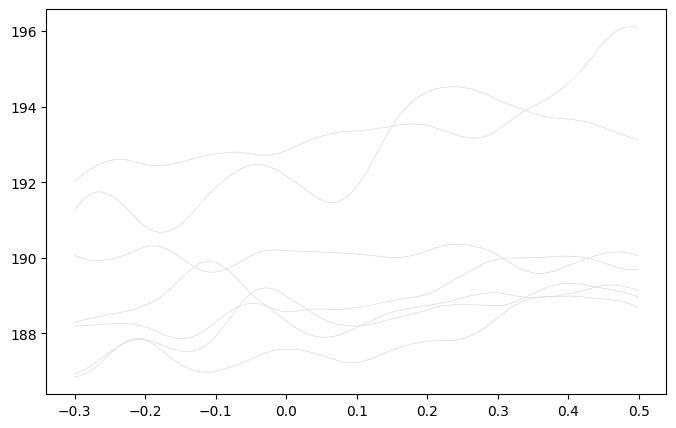

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
ax1.plot(ts, all_signals.T, color=(.85,.85,.85), linewidth=0.5)
plt.show()

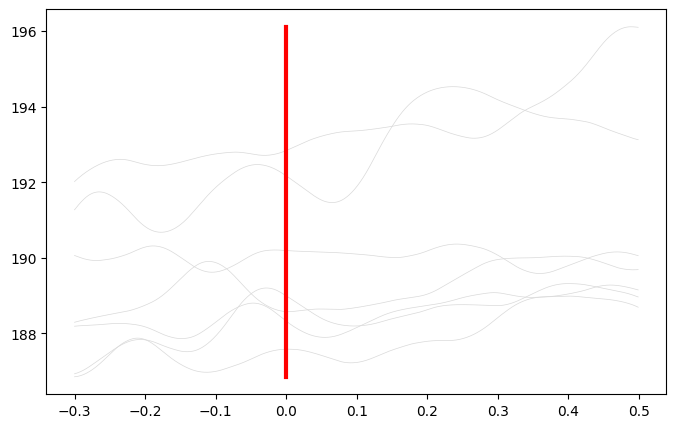

In [14]:
ax1.plot([0, 0], [np.min(all_signals), np.max(all_signals)], color='r', linewidth=3)
plt.show()

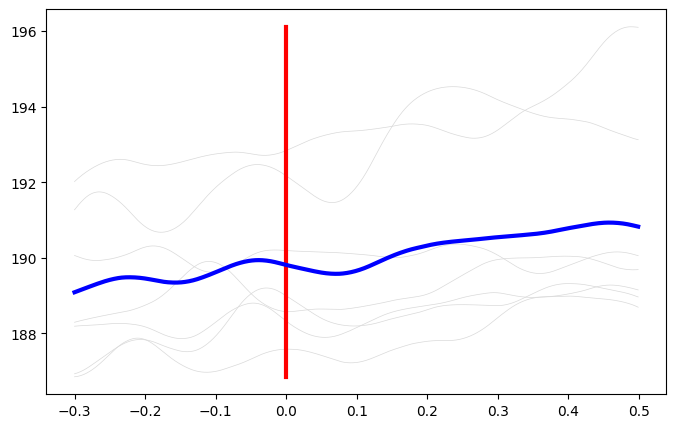

In [15]:
ax1.plot(ts, mean_signal, color='b', linewidth=3)
plt.show()

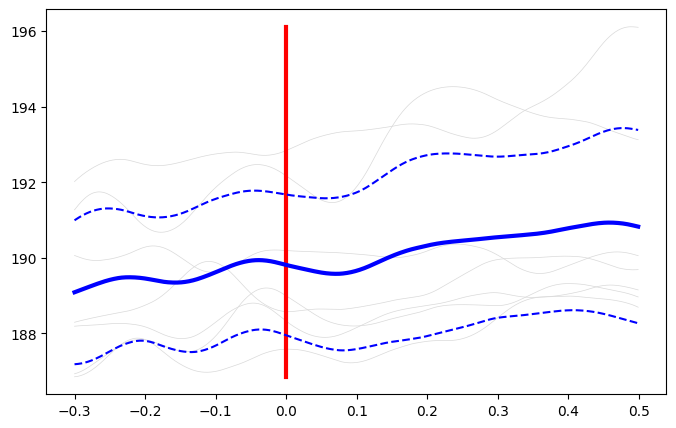

In [16]:
ax1.plot(ts, mean_signal + std_signal, 'b--', ts, mean_signal - std_signal, 'b--')
plt.show()

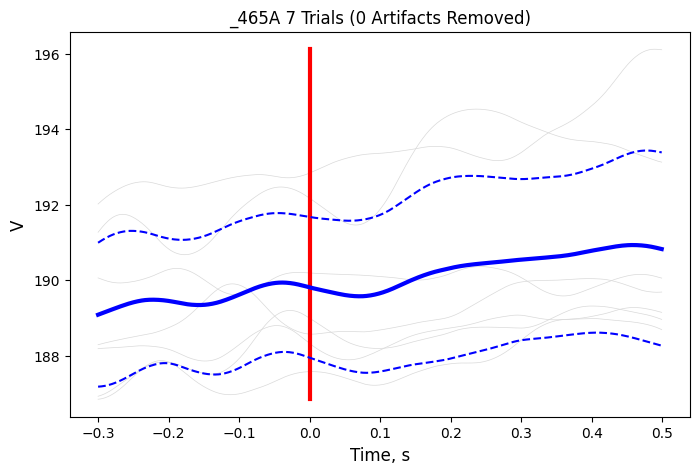

In [17]:
ax1.axis('tight')
ax1.set_xlabel('Time, s',fontsize=12)
ax1.set_ylabel('V',fontsize=12)
ax1.set_title('{0} {1} Trials ({2} Artifacts Removed)'.format(
    STREAM_STORE,
    len(data.streams[STREAM_STORE].filtered),
    num_artifacts))
plt.show()